# Optimisation & Simulation: Lab on MCMC methods

**Objective:**
- Use Markov chain Monte Carlo (MCMC) methods to draw from complex distributions.

**Implementation:**
- Gibbs sampling
- Metropolis-Hastings algorithm

**Agenda:**
1. Implement Gibbs sampler to generate draws from bivariate normal.
2. Implement Metropolis-Hastings algorithms to infer posterior distribution of parameters of Cauchy distribution. 

## Gibbs sampling

### Background

**Motivation and intuition:**
- Draw from multivariate distributions from which direct sampling is difficult.
- Construct conditional distributions from which sampling is easy. 
- Iteratively draw from conditional distributions. 


- Suppose we wish to sample $\theta_{1}, \theta_{2} \sim p(\theta_{1}, \theta_{2})$ but cannot do so directly. 
- However, we can sample $\theta_{1} \sim p(\theta_{1} \vert \theta_{2})$ and $\theta_{2} \sim p(\theta_{2} \vert \theta_{1})$.

**Algorithm:**
1. Set $j = 0$. 
2. Provide initial values $(\theta_{1}^{(0)}, \theta_{2}^{(0)})$. 
3. Set $j = j + 1$. 
4. $\theta_{1}^{(j)} \sim p(\theta_{1}^{(j)} \vert \theta_{2}^{(j-1)})$.
5. $\theta_{2}^{(j)} \sim p(\theta_{2}^{(j)} \vert \theta_{1}^{(j)})$.
6. If $j$ is less than the desired number of draws, return to step 3.

### Exercise
- Implement a Gibbs sampler to draw from a bivariate normal, i.e. 
$$
\begin{pmatrix}
\theta_{1} \\ \theta_{2}
\end{pmatrix}
\sim
\mathcal{N} (\boldsymbol{\mu}, \boldsymbol{\Sigma})
\text{ with }
\boldsymbol{\mu} = \boldsymbol{0},
\boldsymbol{\Sigma} = 
\begin{pmatrix}
1 & \rho \\
\rho & 1 
\end{pmatrix},
\rho = 0.8
$$
- Visually compare the empirical density of the draws to the theoretical density of the sampling distribution. 

**Note:**
- If
$$
\begin{pmatrix}
\theta_{1} \\ \theta_{2}
\end{pmatrix}
\sim
\mathcal{N} \left (\boldsymbol{0}, 
\begin{pmatrix}
1 & \rho \\
\rho & 1 
\end{pmatrix}
\right ),
$$
then 
$$
\theta_{1} \vert \theta_{2} \sim \mathcal{N}(\rho \theta_{2}, 1 - \rho^{2}),
$$
$$
\theta_{2} \vert \theta_{1} \sim \mathcal{N}(\rho \theta_{1}, 1 - \rho^{2}).
$$

#### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
def gibbs(rho, theta2, n_draws):
    """ Gibbs sampling of bivariate normal.
    
    Keywords:
        rho (float): correlation parameter.
        theta2 (float): initial value of theta2.
        n_draws (int): number of draws.
    
    Returns:
        theta (array): draws from bivariate normal.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    theta=np.zeros((2, n_draws))
    
    for j in range(n_draws):
        theta1 = np.random.normal(theta2*rho,1-rho**2)
        theta2 = np.random.normal(theta1*rho,1-rho**2)
        theta[0,j]= theta1
        theta[1,j]= theta2
    return theta

In [3]:
rho = 0.8
theta2 = 0
n_draws = 1000

draws = gibbs(rho, theta2, n_draws)

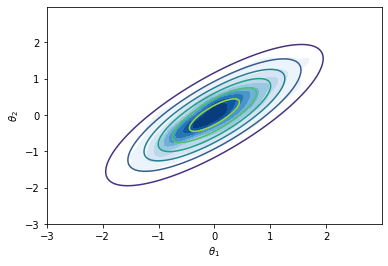

In [4]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

#Theoretical density
mu = np.array([0, 0])
Sigma = np.array([[1, rho], [rho, 1]])
x = np.arange(-3,3,0.01)
xx, yy = np.meshgrid(x,x)
z = multivariate_normal.pdf(np.stack((xx, yy), axis=2), mu, Sigma)
ax.contour(x, x, z)

#Empirical draws
ax = sns.kdeplot(
    draws[0,:], y=draws[1,:],
    cmap= "Blues" , shade = True
)

ax.set(
    xlabel=r'$\theta_1$',
    ylabel=r'$\theta_2$'
)

plt.show()

## Metropolis-Hastings algorithm

### Background

**Motivation and intuition:**
- Gibbs sampling is only feasible, if the conditional distributions are known and if it is easy to sample from them. 
- The Metropolis-Hastings algorithm allows us to sample from any density $p(\theta)$, provided that we can evaluate $f(\theta)$, a density that is proportional to $p$. 
- At each iteration, we sample a new state from a candidate distribution, which depends on the current state. 
- With some probability depending on the value of the target density at the new and the current states, the new state is accepted. 
- As the algorithm proceeds, the sampled states approximate the desired density. 

**Algorithm:**
1. Set $j = 0$.
2. Let $\theta$ denote the current state.
3. Let $p(\theta \vert x)$ denote the target density.
4. Let $J(\theta^{*} \vert \theta)$ denote the jumping distribution
5. Let $\rho$ denote the step size.
6. Set $j = j + 1$. 
7. Propose a new state $\theta^{*} \vert \theta \sim J(\theta)$.
8. Calculate $\alpha = \frac{p(\theta^{*} \vert x)}{p(\theta \vert x)} \cdot \frac{J(\theta \vert \theta^{*})}{J(\theta^{*} \vert \theta)}$.
9. Draw $r \sim \text{Uniform}(0,1)$.
10. If $r \leq \alpha$, accept the new state and set $\theta = \theta^{*}$. Otherwise, reject the new state. 
11. If $j$ is less than the desired number of draws, return to step 5.

### Exercise 
- Simulate data from Cauchy distribution with location $\mu = 1$ and scale $\gamma = 1$.
- Implement a Metroplis-Hastings algorithms to infer the posterior distribution of the scale parameter of the Cauchy distribution.
- Consider two possible jumping distributions:
- 1. $\text{Normal}(\theta, \rho^2)$, where $\rho$ is the step size.
- 2. $\text{Lognormal}(\theta - 0.5 \rho^2, \rho^2)$, where $\rho$ is a distance parameter.
- Evaluate the performance of the algorithms for different parametrisations of the jumping distributions. Compute the potential scale reduction factors $\hat{R}$ and the effective sample size $n_{\text{eff}}$.

Suppose
- $x_{i} \sim \mathcal{C}(\mu, \gamma)$ for $i \in \{1, \dots, N\}$
- $\gamma \sim \text{Gamma}(\alpha_{0}, \beta_{0})$ with $\alpha_{0} = \beta_{0} = 0.001$.

Then
$$
p(\gamma \vert x, \mu, \alpha_{0}, \beta_{0}) 
\propto \left ( \prod_{i} p(x_{i} \vert \mu, \gamma) \right ) p(\gamma \vert \alpha_{0}, \beta_{0})
$$

**Note:**
- PDF of Cauchy distribution:
$$
f(x \vert \mu, \gamma) = \frac{1}{\pi \gamma \left [ 1 + \left (\frac{x - \mu}{\gamma} \right )^{2} \right ]}
$$
- Quantile function of Cauchy distribution:
$$
Q = \mu + \gamma \cdot \text{tan}\left [ \pi \left ( F - \frac{1}{2} \right ) \right ]
$$

#### Cauchy random draws

In [5]:
def cauchy_pdf(gamma,x,mu):
    return 1/(np.pi*gamma*(1+((x-mu)/gamma)**2))

def cauchy_rng(mu, gamma, n_draws):
    """ Generate cauchy random numbers.
    
    Keywords:
        mu (float): location parameter.
        gamma (float): scale parameter.
        n_draws (int): number of draws.
    
    Returns:
        r (array): n_draws draws from Cauchy(mu, gamma).
    """
    u = np.random.rand(n_draws,)
    r = mu + gamma * np.tan(np.pi * (u - 0.5))
    return r

In [6]:
mu = 1
gamma_true = 1
n_draws = 1000
x = cauchy_rng(mu, gamma_true, n_draws)

#### Normal jumping distribution
##### Implementation

In [7]:
def rhat_n_eff(draws):
    """ Computes potential scale reduction factor and effective sample size.
    
    Keywords:
        draws (1d-array): draws
    
    Returns:
        R (float): potential scale reduction factor.
        n_eff (float): effective sample size.
    """
    #Reshape draws
    psi_cd = np.array(draws).reshape(2,-1)
    C, D = psi_cd.shape
    
    #Rhat
    psi_c = psi_cd.mean(axis=1, keepdims=True)
    psi = psi_c.mean()
    B = D / (C - 1) * np.sum((psi_c - psi)**2) #Between-chain variance
    s2_c = 1 / (D - 1) * np.sum((psi_cd - psi_c)**2, axis=1)
    W = s2_c.mean() #Within-chain variance
    var = (D - 1) / D * W + 1 / D * B
    R = np.sqrt(var / W)
    
    #Effective sample size
    V = lambda t: ((psi_cd[:,t:] - psi_cd[:,:(D-t)])**2).sum() / (C * (D - t)) #Variogram
    negative_autocorr = False
    t = 1
    rho = np.ones(D)
    while not negative_autocorr and (t < D):
        rho[t] = 1 - V(t) / (2 * var)
        if not t % 2:
            negative_autocorr = np.sum(rho[t-1:t+1]) < 0
        t += 1
    n_eff = C * D / (1 + 2 * np.sum(rho[1:t]))
    
    return R, n_eff

In [8]:
def loglikelihood(x,mu,gamma):
    # log1p calculates log(1+x)
    return np.sum(-np.log(gamma)-np.log1p(((x-mu)/gamma)**2))

def logprior(gamma,alpha0,beta0):
    return (alpha0-1)*np.log(gamma)-beta0*gamma

def logtarget(x,mu,gamma,alpha0,beta0):
    ll=loglikelihood(x,mu,gamma)
    lp=logprior(gamma,alpha0,beta0)
    return ll+lp
    
def mh_step_normal(x,mu,gamma,alpha0,beta0,lt,rho):
    
    gamma_star=gamma+rho*np.random.randn()
    
    if gamma_star<=0:
        accept=False
    else:
        lt_star=logtarget(x,mu,gamma_star,alpha0,beta0)
        
        log_r=np.log(np.random.rand())
        log_alpha=lt_star-lt
        
        if log_r <= log_alpha:
            gamma = gamma_star
            lt = lt_star
            accept = True
        else:
            accept = False
    return gamma,lt, accept
    
def mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep):
    """ MCMC algorithm with normal jumping distribution to estimate posterior of Cauchy scale parameter.
    
    Keywords:
        x (array): data.
        mu (float): Cauchy location parameter.
        gamma (float): Cauchy scale parameter.
        alpha0 (float): Gamma shape, gamma ~ Gamma(alpha0, beta0).
        beta0 (float): Gamma rate, gamma ~ Gamma(alpha0, beta0).
        rho (float): step size.
        n_burn (int): burn in draws.
        n_keep (int): number of draws to keep after burn-in. 
    
    Returns:
        gamma_store (array): gamma draws.
        accept_store (array): accept flags.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    
    gamma_store=np.zeros(n_keep)
    accept_store=np.zeros(n_keep)
    
    ltarget=logtarget(x,mu,gamma,alpha0,beta0)
    
    j= -1
    for i in np.arange(n_keep+n_burn):
    
        gamma,ltarget,accept=mh_step_normal(x,mu,gamma,alpha0,beta0,ltarget,rho)
        
        if i >=n_burn:
            j+=1
            gamma_store[j]=gamma
            accept_store[j]=accept
            
    return gamma_store, accept_store

In [9]:
mu = 1
gamma = 0.1
alpha0 = 0.001
beta0 = 0.001
rho = 0.1
n_burn = 1000
n_keep = 1000

gamma_store, accept_store = mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)

In [10]:
gamma_store.mean()

0.9623525471117225

In [11]:
gamma_store.std()

0.0470595786507495

In [12]:
accept_store.mean()

0.487

In [13]:
rhat_n_eff(gamma_store)

(1.004171437603883, 211.28536796425405)

In [14]:
rho_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1]

gamma_store_all = {}
gamma_mean = []
gamma_std = []
gamma_accept = []
gamma_rhat = []
gamma_n_eff = []

for rho in rho_test:
    gamma_store, accept_store = mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)
    rhat, n_eff = rhat_n_eff(gamma_store)
    
    gamma_store_all[rho] = gamma_store
    gamma_mean.append(gamma_store.mean())
    gamma_std.append(gamma_store.std())
    gamma_accept.append(accept_store.mean())
    gamma_rhat.append(rhat)
    gamma_n_eff.append(n_eff)

In [15]:
results = pd.DataFrame(
    data={
        'rho': rho_test,
        'Post. mean': gamma_mean,
        'Post. std.': gamma_std,
        'Acceptance ratio': gamma_accept,
        'Rhat': gamma_rhat,
        'n_eff': gamma_n_eff
    }
)
results

,rho,Post. mean,Post. std.,Acceptance ratio,Rhat,n_eff
0,0.00001,0.100209,0.000173,0.963,1.610006,2.366889
1,0.00010,0.133240,0.005460,0.825,3.219811,1.246097
2,0.00100,0.523732,0.047225,0.830,2.394766,1.545837
3,0.01000,0.957641,0.047452,0.927,0.999920,6.061974
4,0.10000,0.962150,0.042278,0.447,1.001517,295.897034
5,0.25000,0.961923,0.044404,0.221,0.999393,142.880931
6,0.50000,0.962111,0.043093,0.118,1.002697,72.194432
7,1.00000,0.974637,0.042597,0.047,1.018852,15.909887


##### Trace plot

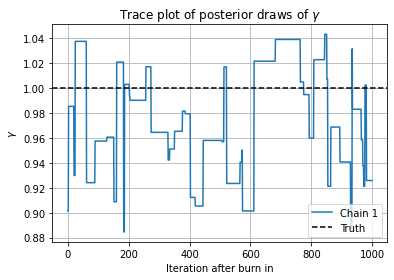

In [16]:
fig, ax = plt.subplots(1,1)
ax.plot(gamma_store_all[1], label = 'Chain 1')
plt.axhline(gamma_true, color="black", linestyle="--", label='Truth')

ax.set(xlabel = 'Iteration after burn in', ylabel = r'$\gamma$',
       title= r'Trace plot of posterior draws of $\gamma$')
plt.legend()
ax.grid()

#### Lognormal jumping distribution
##### Implementation

In [17]:
# Logarithmic pdf
def lognormal_lpdf(x, mu, sigma):
    lpdf = -np.log(x) - (np.log(x) - mu)**2 / (2 * sigma**2)
    return lpdf

def mh_step_lognormal(x,mu,gamma,alpha0,beta0,lt,rho):
    
    # Non symmetric distribution
    gamma_star = np.exp(np.log(gamma)-0.5*(rho**2)+rho*np.random.randn()) 
    
    lt_star = logtarget(x,mu,gamma_star,alpha0,beta0)
    
    ljump_star = lognormal_lpdf(gamma_star, np.log(gamma)-0.5*(rho**2), rho)
    ljump = lognormal_lpdf(gamma, np.log(gamma_star)-0.5*(rho**2), rho)
    
    log_r = np.log(np.random.rand())
    
    # Logarithm shortens execution time
    # Adding jump distribution due to non-symmetric distribution
    log_alpha = (lt_star - lt) + (ljump - ljump_star)

    if log_r <= log_alpha:
        
        gamma = gamma_star
        lt = lt_star
        accept = True
        
    else:
        accept = False
    
    return gamma, lt, accept

def mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep):
    """ MCMC algorithm with lognormal jumping distribution to estimate posterior of Cauchy scale parameter.
    
    Keywords:
        x (array): data.
        mu (float): Cauchy location parameter.
        gamma (float): Cauchy scale parameter.
        alpha0 (float): Gamma shape, gamma ~ Gamma(alpha0, beta0).
        beta0 (float): Gamma rate, gamma ~ Gamma(alpha0, beta0).
        rho (float): step size.
        n_burn (int): burn in draws.
        n_keep (int): number of draws to keep after burn-in. 
    
    Returns:
        gamma_store (array): gamma draws.
        accept_store (array): accept flags.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    
    gamma_store=np.zeros(n_keep)
    accept_store=np.zeros(n_keep)
    
    ltarget=logtarget(x,mu,gamma,alpha0,beta0)
    
    j= -1
    
    for i in np.arange(n_keep+n_burn):
    
        gamma,ltarget,accept = mh_step_lognormal(x,mu,gamma,alpha0,beta0,ltarget,rho)
        
        if i >=n_burn:
            j+=1
            gamma_store[j]=gamma
            accept_store[j]=accept
            
    return gamma_store, accept_store

In [18]:
mu = 1
gamma = 0.1
alpha0 = 0.001
beta0 = 0.001
rho = 0.1
n_burn = 1000
n_keep = 1000

gamma_store, accept_store = mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)

In [19]:
gamma_store.mean()

0.9593764195836668

In [20]:
gamma_store.std()

0.043010556037469894

In [21]:
accept_store.mean()

0.46

In [22]:
rhat_n_eff(gamma_store)

(1.007727401704478, 148.1988987214693)

In [23]:
rho_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1]

gamma_store_all = {}
gamma_mean = []
gamma_std = []
gamma_accept = []
gamma_rhat = []
gamma_n_eff = []

for rho in rho_test:
    gamma_store, accept_store = mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)
    rhat, n_eff = rhat_n_eff(gamma_store)
    
    gamma_store_all[rho] = gamma_store
    gamma_mean.append(gamma_store.mean())
    gamma_std.append(gamma_store.std())
    gamma_accept.append(accept_store.mean())
    gamma_rhat.append(rhat)
    gamma_n_eff.append(n_eff)

In [24]:
results = pd.DataFrame(
    data={
        'rho': rho_test,
        'Post. mean': gamma_mean,
        'Post. std.': gamma_std,
        'Acceptance ratio': gamma_accept,
        'Rhat': gamma_rhat,
        'n_eff': gamma_n_eff
    }
)
results

,rho,Post. mean,Post. std.,Acceptance ratio,Rhat,n_eff
0,0.00001,0.100010,0.000008,0.997,1.003332,5.771614
1,0.00010,0.100404,0.000111,0.974,1.158828,4.050267
2,0.00100,0.145910,0.008671,0.814,2.418447,1.515898
3,0.01000,0.979648,0.033592,0.943,1.016023,23.307583
4,0.10000,0.956938,0.041807,0.435,1.005435,125.037844
5,0.25000,0.965715,0.041470,0.211,1.000440,144.525639
6,0.50000,0.958344,0.043997,0.100,1.000857,76.702928
7,1.00000,0.966592,0.051165,0.059,1.004442,44.025109


##### Trace plot

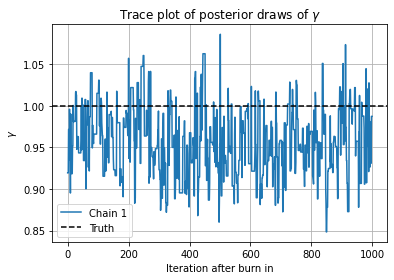

In [25]:
fig, ax = plt.subplots(1,1)
ax.plot(gamma_store_all[0.1], label = 'Chain 1')
plt.axhline(gamma_true, color="black", linestyle="--", label='Truth')

ax.set(xlabel = 'Iteration after burn in', ylabel = r'$\gamma$',
       title= r'Trace plot of posterior draws of $\gamma$')
plt.legend()
ax.grid()